In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [3]:
df = pd.read_csv("data.csv")
# To display the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [5]:
len(pd.unique(df['Make']))

48

In [5]:
len(pd.unique(df['Model']))

915

In [6]:
len(df.index)

11914

In [7]:
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [6]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [7]:
df = df.rename(columns={'Engine HP': 'HP', 'Engine Cylinders': 'Cylinders', 'Transmission Type': 'Transmission', 'Driven_Wheels': 'Drive Mode','highway MPG': 'MPG-H', 'city mpg': 'MPG-C', 'MSRP': 'Price' })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [8]:
df.shape
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)
df.count()

number of duplicate rows:  (989, 10)


Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [9]:
# drop duplicates
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [10]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [11]:
df = df.dropna() 
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

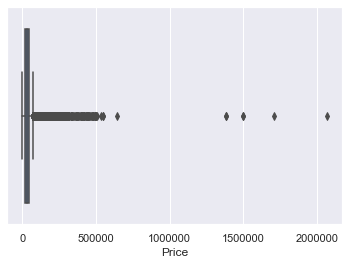

In [12]:
sns.boxplot(x=df['Price'])

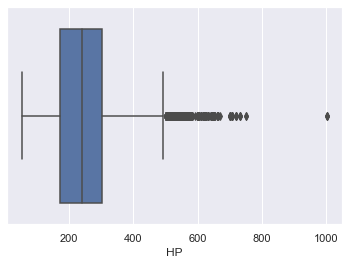

In [11]:
sns.boxplot(x=df['HP'])

In [12]:
# removing outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


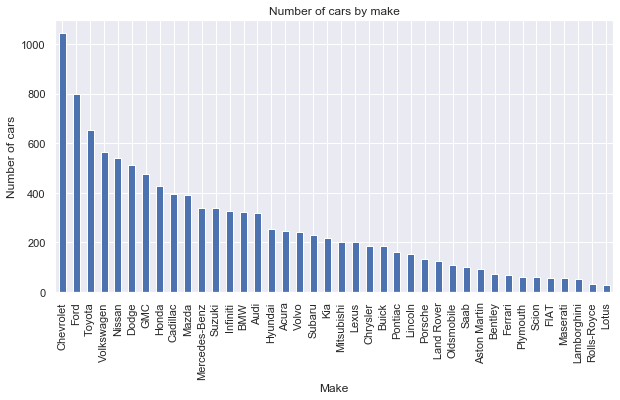

In [13]:
# Plotting a Histogram
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Number of cars by make')
plt.ylabel('Number of cars')
plt.xlabel('Make');


,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
MPG-H,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
MPG-C,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
Price,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


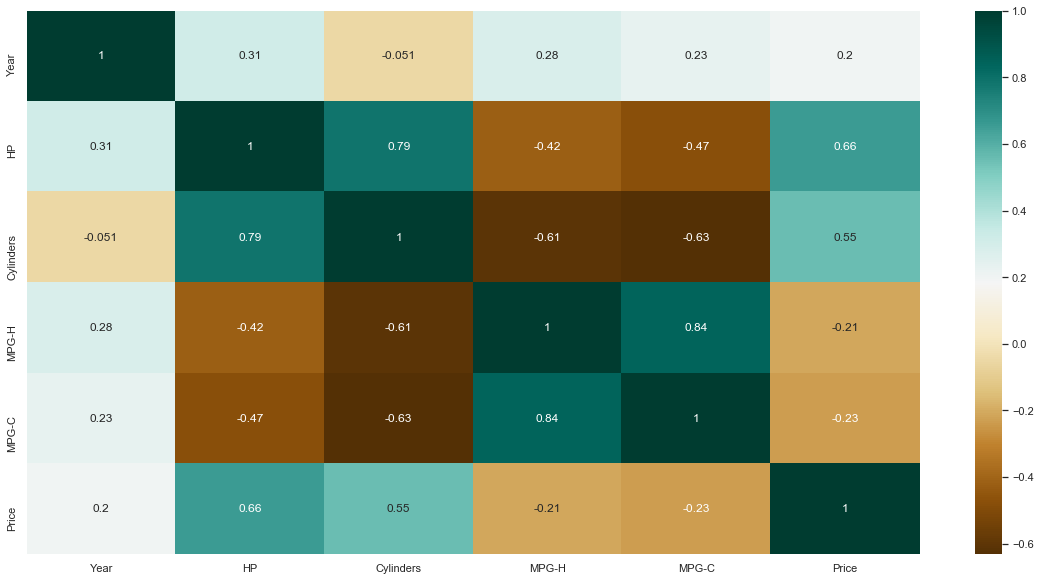

In [14]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

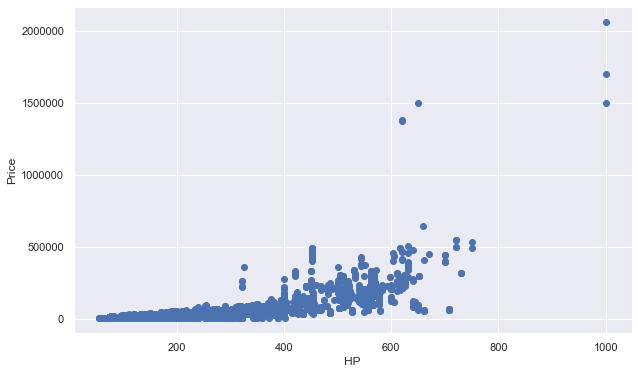

In [15]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

In [26]:
# looking at cars over a certain horsepower but under a certain price
new_df = df[((df['HP'] > 400) & (df['Price'] < 40000))]

In [27]:
new_df

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
670,Mercedes-Benz,600-Class,1992,402.0,12.0,AUTOMATIC,rear wheel drive,14,10,2960
2174,Chevrolet,Camaro,2015,426.0,8.0,MANUAL,rear wheel drive,24,16,39505
2175,Chevrolet,Camaro,2015,426.0,8.0,MANUAL,rear wheel drive,24,16,33505
2176,Chevrolet,Camaro,2015,426.0,8.0,MANUAL,rear wheel drive,24,16,37305
2190,Chevrolet,Camaro,2016,455.0,8.0,MANUAL,rear wheel drive,25,16,36300
2196,Chevrolet,Camaro,2017,455.0,8.0,MANUAL,rear wheel drive,25,16,36905
2449,Dodge,Challenger,2015,485.0,8.0,MANUAL,rear wheel drive,23,14,37995
2459,Dodge,Challenger,2016,485.0,8.0,MANUAL,rear wheel drive,23,14,37995
2467,Dodge,Challenger,2017,485.0,8.0,MANUAL,rear wheel drive,23,14,37995
2480,Dodge,Charger,2015,485.0,8.0,AUTOMATIC,rear wheel drive,25,15,39995


In [28]:
df

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


In [29]:
# average price of certain models
# would we want to take a car model, it's average price, cylinders, and horsepower, and predict price depending
# on how much higher or lower the hp/cylinders are vs the average - this is like linear regression?
# my initial thoughts are that people are using all these machine learning models to do all the predictions for them,
# is this typical of data science?  Am I wrong in assuming these calculations are abstracted away?

In [30]:
# unique makes
# trying to come to the conclusion that price is correlated with make
df['Make'].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Bugatti'],
      dtype=object)

In [73]:
dfavg = df[['Make', 'Price']].groupby('Make').mean().reset_index()

In [89]:
dfavg

,Make,Price
0,Acura,3.508749e+04
1,Alfa Romeo,6.160000e+04
2,Aston Martin,1.981235e+05
3,Audi,5.473842e+04
4,BMW,6.216256e+04
5,Bentley,2.471693e+05
6,Bugatti,1.757224e+06
7,Buick,2.991574e+04
8,Cadillac,5.636827e+04
9,Chevrolet,2.957515e+04


In [96]:
# fix price
df_correct = dfavg['Price'].apply(lambda x: '%.5f' % x).reset_index()

In [97]:
df_correct

,index,Price
0,0,35087.48780
1,1,61600.00000
2,2,198123.46154
3,3,54738.41563
4,4,62162.55864
5,5,247169.32432
6,6,1757223.66667
7,7,29915.73913
8,8,56368.26515
9,9,29575.14669


In [101]:
new_df = pd.DataFrame([dfavg['Make'], df_correct['Price']])

In [102]:
new_df

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
Make,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Porsche,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Toyota,Volkswagen,Volvo
Price,35087.48780,61600.00000,198123.46154,54738.41563,62162.55864,247169.32432,1757223.66667,29915.73913,56368.26515,29575.14669,...,101347.13433,351130.64516,29929.69307,19932.50000,214990.00000,24533.41048,18216.07692,27719.78034,28995.23268,32600.68880


In [4]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [16]:
df
# INFORMATION EXTRACTION - ALL BELOW
# check the goodness of fit - r2 score - mean squared error
# sklearn linear regression MSE - mean squared error
# how to adjust for high correlation
# normalize the coefficients
# bootstrapping - multiple experiments - could be a for loop that tests parts of the data
# p-value - way to get probability of...
# training splits and testing how good the fit is
# one hot encoding to create numeric values from categorical variables
# multicolliniarity - for the future
# central limit theorem

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


In [17]:
# independent variable
X = df['HP']
# target variable
y = df['Price']

In [18]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [19]:
X_train

7538     284.0
9592     355.0
10740    281.0
2900     275.0
9845     290.0
         ...  
366      184.0
85       184.0
8868     333.0
7561     453.0
6132     210.0
Name: HP, Length: 7578, dtype: float64

In [20]:
y_train

7538      42070
9592      53015
10740     30995
2900      38790
9845      30790
          ...  
366       25545
85        21995
8868      54300
7561     407400
6132      26920
Name: Price, Length: 7578, dtype: int64

In [21]:
X_test

5021     188.0
8994     290.0
9326     285.0
10723    275.0
674      140.0
         ...  
6528     227.0
7088     300.0
9450     295.0
614      543.0
10937    310.0
Name: HP, Length: 3249, dtype: float64

In [26]:
#By default, the statsmodel library fits a line that passes through the origin. 
#But if we observe the simple linear regression equation y = c + mX, 
#it has an intercept value as c. 
#So, to have an intercept, we need to add the add_constant attribute manually.

# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [27]:
# Fitting the resgression line using 'OLS'
# ordinary lease squares
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const   -50766.620701
HP         365.188732
dtype: float64

In [28]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     6737.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:03:45   Log-Likelihood:                -91594.
No. Observations:                7578   AIC:                         1.832e+05
Df Residuals:                    7576   BIC:                         1.832e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.077e+04   1242.799    -40.849      0.000   -5.32e+04   -4.83e+04
HP           365.1887      4.449     82.081      0.000     356.467     373.910
==============================================================================
Omnibus:                    13319.856   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         31606200.265
Skew:                          12.129   Prob(JB):                         0.00
Kurtosis:                     318.453   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

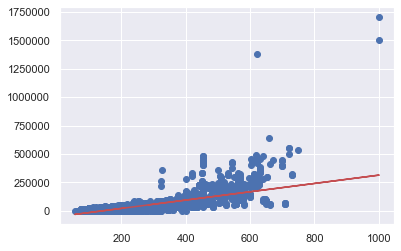

In [31]:
# Visualizing the regression line
# high correlation makes a biased assumption
plt.scatter(X_train, y_train)
# y = c + mX
# Price = coefficient const + cooefficient HP * HP
plt.plot(X_train, -5.077e+04 + 365.1887*X_train, 'r')
plt.show()

In [32]:
new_df = df[df['Price'] < 500000]

In [33]:
new_df

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


In [34]:
# independent variable
X = new_df['HP']
# target variable
y = new_df['Price']

In [35]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [36]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [37]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     6737.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:38:53   Log-Likelihood:                -91594.
No. Observations:                7578   AIC:                         1.832e+05
Df Residuals:                    7576   BIC:                         1.832e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.077e+04   1242.799    -40.849      0.000   -5.32e+04   -4.83e+04
HP           365.1887      4.449     82.081      0.000     356.467     373.910
==============================================================================
Omnibus:                    13319.856   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         31606200.265
Skew:                          12.129   Prob(JB):                         0.00
Kurtosis:                     318.453   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

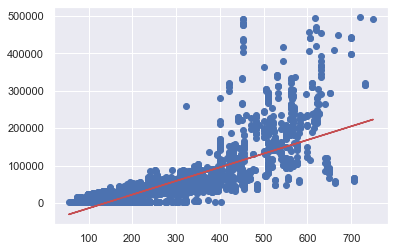

In [38]:
plt.scatter(X_train, y_train)
# y = c + mX
# Price = coefficient const + cooefficient HP * HP
plt.plot(X_train, -5.077e+04 + 365.1887*X_train, 'r')
plt.show()

In [1]:
# look into other regressions
# polynomial regression

In [15]:
# independent variable
X = df[{'HP', 'MPG-H'}]
# target variable
y = df['Price']

In [16]:
X

,HP,MPG-H
0,335.0,26
1,300.0,28
2,300.0,28
3,230.0,28
4,230.0,28
...,...,...
11909,300.0,23
11910,300.0,23
11911,300.0,23
11912,300.0,23


In [17]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [18]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
# Fitting the resgression line using 'OLS'
# ordinary lease squares
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const   -71250.952291
HP         382.640869
MPG-H      607.850434
dtype: float64

In [20]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     3443.
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        08:56:19   Log-Likelihood:                -91554.
No. Observations:                7578   AIC:                         1.831e+05
Df Residuals:                    7575   BIC:                         1.831e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.125e+04   2613.270    -27.265      0.000   -7.64e+04   -6.61e+04
HP           382.6409      4.841     79.034      0.000     373.150     392.131
MPG-H        607.8504     68.317      8.897      0.000     473.930     741.771
==============================================================================
Omnibus:                    13366.787   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32234772.331
Skew:                          12.219   Prob(JB):                         0.00
Kurtosis:                     321.579   Cond. No.                     1.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# independent variable
X = df[{'HP', 'MPG-H', 'Year'}]
# target variable
y = df['Price']

In [22]:
X

,Year,HP,MPG-H
0,2011,335.0,26
1,2011,300.0,28
2,2011,300.0,28
3,2011,230.0,28
4,2011,230.0,28
...,...,...,...
11909,2012,300.0,23
11910,2012,300.0,23
11911,2012,300.0,23
11912,2013,300.0,23


In [23]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [24]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
# Fitting the resgression line using 'OLS'
# ordinary lease squares
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const    947274.316013
Year       -511.429822
HP          399.140013
MPG-H       824.492063
dtype: float64

In [26]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     2319.
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        08:59:39   Log-Likelihood:                -91536.
No. Observations:                7578   AIC:                         1.831e+05
Df Residuals:                    7574   BIC:                         1.831e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.473e+05   1.66e+05      5.693      0.000    6.21e+05    1.27e+06
Year        -511.4298     83.534     -6.122      0.000    -675.179    -347.681
HP           399.1400      5.531     72.167      0.000     388.298     409.982
MPG-H        824.4921     76.792     10.737      0.000     673.959     975.025
==============================================================================
Omnibus:                    13252.766   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         31143139.982
Skew:                          11.994   Prob(JB):                         0.00
Kurtosis:                     316.140   Cond. No.                     6.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
new_df = df[(df['HP'] < 400) & (df['Price'] < 100000)]

In [43]:
new_df

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


In [65]:
# independent variable
X = new_df['HP']
# target variable
y = new_df['Price']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [67]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [68]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     2319.
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:20:30   Log-Likelihood:                -91536.
No. Observations:                7578   AIC:                         1.831e+05
Df Residuals:                    7574   BIC:                         1.831e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.473e+05   1.66e+05      5.693      0.000    6.21e+05    1.27e+06
Year        -511.4298     83.534     -6.122      0.000    -675.179    -347.681
HP           399.1400      5.531     72.167      0.000     388.298     409.982
MPG-H        824.4921     76.792     10.737      0.000     673.959     975.025
==============================================================================
Omnibus:                    13252.766   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         31143139.982
Skew:                          11.994   Prob(JB):                         0.00
Kurtosis:                     316.140   Cond. No.                     6.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

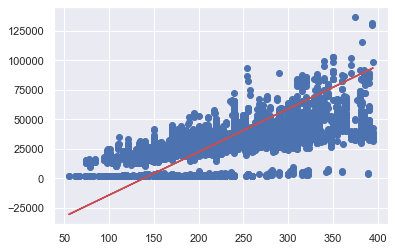

In [48]:
# Visualizing the regression line
# high correlation makes a biased assumption
plt.scatter(X_train, y_train)
# y = c + mX
# Price = coefficient const + cooefficient HP * HP
plt.plot(X_train, -5.077e+04 + 365.1887*X_train, 'r')
plt.show()

In [49]:
# independent variable
X = new_df[{'HP', 'MPG-H', 'Year'}]
# target variable
y = new_df['Price']

In [56]:
X

,Year,HP,MPG-H
0,2011,335.0,26
1,2011,300.0,28
2,2011,300.0,28
3,2011,230.0,28
4,2011,230.0,28
...,...,...,...
11909,2012,300.0,23
11910,2012,300.0,23
11911,2012,300.0,23
11912,2013,300.0,23


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [62]:
X_train

,Year,HP,MPG-H
5949,2004,200.0,27
6529,2009,227.0,26
5746,2016,270.0,25
3627,2016,295.0,25
2557,2015,110.0,47
...,...,...,...
379,2015,155.0,41
85,2017,184.0,36
9908,2009,138.0,32
8562,1995,260.0,23


In [63]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [64]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     2319.
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:17:14   Log-Likelihood:                -91536.
No. Observations:                7578   AIC:                         1.831e+05
Df Residuals:                    7574   BIC:                         1.831e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.473e+05   1.66e+05      5.693      0.000    6.21e+05    1.27e+06
Year        -511.4298     83.534     -6.122      0.000    -675.179    -347.681
HP           399.1400      5.531     72.167      0.000     388.298     409.982
MPG-H        824.4921     76.792     10.737      0.000     673.959     975.025
==============================================================================
Omnibus:                    13252.766   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         31143139.982
Skew:                          11.994   Prob(JB):                         0.00
Kurtosis:                     316.140   Cond. No.                     6.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
new_df = df[(df['Price'] < 100000) & (df['HP'] < 450)]

In [82]:
# independent variable
X = new_df['HP']
# target variable
y = new_df['Price']

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, 
                                                    test_size = 0.2)

In [105]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [106]:
# Fitting the resgression line using 'OLS'
# ordinary lease squares
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const   -8361.308677
HP        168.586691
dtype: float64

In [107]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                 1.044e+04
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:30:10   Log-Likelihood:                -86416.
No. Observations:                8013   AIC:                         1.728e+05
Df Residuals:                    8011   BIC:                         1.729e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8361.3087    405.576    -20.616      0.000   -9156.344   -7566.273
HP           168.5867      1.650    102.169      0.000     165.352     171.821
==============================================================================
Omnibus:                      371.571   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1274.599
Skew:                          -0.083   Prob(JB):                    1.68e-277
Kurtosis:                       4.947   Cond. No.                         764.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

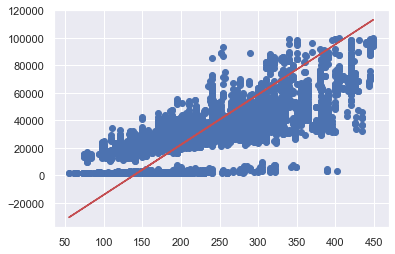

In [108]:
# Visualizing the regression line
# high correlation makes a biased assumption
plt.scatter(X_train, y_train)
# y = c + mX
# Price = coefficient const + cooefficient HP * HP
plt.plot(X_train, -5.077e+04 + 365.1887*X_train, 'r')
plt.show()

In [116]:
# independent variable
X = new_df[{'HP', 'MPG-H', 'Year'}]
# target variable
y = new_df['Price']

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, 
                                                    test_size = 0.2)

In [119]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [120]:
# Fitting the resgression line using 'OLS'
# ordinary lease squares
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const   -1.657122e+06
Year     8.192499e+02
HP       1.478824e+02
MPG-H    2.297504e+02
dtype: float64

In [121]:
# this is incorrect because the columns weren't normalized
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     6215.
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:31:54   Log-Likelihood:                -84827.
No. Observations:                8013   AIC:                         1.697e+05
Df Residuals:                    8009   BIC:                         1.697e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.657e+06   3.86e+04    -42.925      0.000   -1.73e+06   -1.58e+06
Year         819.2499     19.492     42.030      0.000     781.040     857.460
HP           147.8824      1.867     79.209      0.000     144.223     151.542
MPG-H        229.7504     21.568     10.652      0.000     187.472     272.029
==============================================================================
Omnibus:                     1469.926   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4750.715
Skew:                           0.930   Prob(JB):                         0.00
Kurtosis:                       6.282   Cond. No.                     7.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,Year,HP,MPG-H
0,2011,335.0,26
1,2011,300.0,28
2,2011,300.0,28
3,2011,230.0,28
4,2011,230.0,28
...,...,...,...
11909,2012,300.0,23
11910,2012,300.0,23
11911,2012,300.0,23
11912,2013,300.0,23


In [123]:
# one hot encoding
transmission = pd.get_dummies(new_df.Transmission)

In [124]:
X

,AUTOMATED_MANUAL,AUTOMATIC,DIRECT_DRIVE,MANUAL,UNKNOWN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
11909,0,1,0,0,0
11910,0,1,0,0,0
11911,0,1,0,0,0
11912,0,1,0,0,0


In [125]:
X

,Year,HP,MPG-H
0,2011,335.0,26
1,2011,300.0,28
2,2011,300.0,28
3,2011,230.0,28
4,2011,230.0,28
...,...,...,...
11909,2012,300.0,23
11910,2012,300.0,23
11911,2012,300.0,23
11912,2013,300.0,23


In [126]:
# normalize variables

In [185]:
# independent variable
EX = new_df[{'HP', 'MPG-H', 'Year'}]
# target variable
why = new_df['Price']

In [186]:
EX

,Year,HP,MPG-H
0,2011,335.0,26
1,2011,300.0,28
2,2011,300.0,28
3,2011,230.0,28
4,2011,230.0,28
...,...,...,...
11909,2012,300.0,23
11910,2012,300.0,23
11911,2012,300.0,23
11912,2013,300.0,23


In [187]:
# turns into numpy array
EX_values = EX.values

In [188]:
EX_values

array([[2011.,  335.,   26.],
       [2011.,  300.,   28.],
       [2011.,  300.,   28.],
       ...,
       [2012.,  300.,   23.],
       [2013.,  300.,   23.],
       [2006.,  221.,   26.]])

In [189]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
EX_scaled = min_max_scaler.fit_transform(EX)

In [190]:
#normaliza the values
EX_scaled

array([[0.77777778, 0.7106599 , 0.04093567],
       [0.77777778, 0.62182741, 0.04678363],
       [0.77777778, 0.62182741, 0.04678363],
       ...,
       [0.81481481, 0.62182741, 0.03216374],
       [0.85185185, 0.62182741, 0.03216374],
       [0.59259259, 0.4213198 , 0.04093567]])

In [193]:
NEW_EX_DF = pd.DataFrame(EX_scaled, columns = EX.columns, index=EX.index)

In [194]:
# normalized data
NEW_EX_DF

,Year,HP,MPG-H
0,0.777778,0.710660,0.040936
1,0.777778,0.621827,0.046784
2,0.777778,0.621827,0.046784
3,0.777778,0.444162,0.046784
4,0.777778,0.444162,0.046784
...,...,...,...
11909,0.814815,0.621827,0.032164
11910,0.814815,0.621827,0.032164
11911,0.814815,0.621827,0.032164
11912,0.851852,0.621827,0.032164


In [157]:
X

,Year,HP,MPG-H
0,2011,335.0,26
1,2011,300.0,28
2,2011,300.0,28
3,2011,230.0,28
4,2011,230.0,28
...,...,...,...
11909,2012,300.0,23
11910,2012,300.0,23
11911,2012,300.0,23
11912,2013,300.0,23


In [158]:
y

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: Price, Length: 10017, dtype: int64

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NEW_EX_DF, y, train_size = 0.8, 
                                                    test_size = 0.2)

In [204]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [170]:
y_train

10355    32370
3939     27950
2744     23425
11889    37700
9297     27560
         ...  
2920      2079
4609      3008
592      27035
4920     19650
6202     31795
Name: Price, Length: 8013, dtype: int64

In [205]:
# rerun analysis
# Fitting the resgression line using 'OLS'
# ordinary lease squares
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const   -16206.587751
Year     21893.109200
HP       59344.517321
MPG-H    81186.658682
dtype: float64

In [166]:
NEW_EX_DF

,Year,HP,MPG-H
0,0.777778,0.710660,0.040936
1,0.777778,0.621827,0.046784
2,0.777778,0.621827,0.046784
3,0.777778,0.444162,0.046784
4,0.777778,0.444162,0.046784
...,...,...,...
10012,0.814815,0.621827,0.032164
10013,0.814815,0.621827,0.032164
10014,0.814815,0.621827,0.032164
10015,0.851852,0.621827,0.032164


In [167]:
y

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: Price, Length: 10017, dtype: int64

In [206]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     6055.
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:09:16   Log-Likelihood:                -84972.
No. Observations:                8013   AIC:                         1.700e+05
Df Residuals:                    8009   BIC:                         1.700e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.621e+04    462.814    -35.018      0.000   -1.71e+04   -1.53e+04
Year        2.189e+04    533.754     41.017      0.000    2.08e+04    2.29e+04
HP          5.934e+04    742.170     79.961      0.000    5.79e+04    6.08e+04
MPG-H       8.119e+04   7285.190     11.144      0.000    6.69e+04    9.55e+04
==============================================================================
Omnibus:                     1446.774   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4564.631
Skew:                           0.923   Prob(JB):                         0.00
Kurtosis:                       6.204   Cond. No.                         90.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# what I have learned

# not normalizing the data can increase/decrease R-squared score
# because larger columns values could dictate the performance
# of the model

# random samples are important, you need to retrain the model
# multiple times to understand variance in R-squared score